In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


In [2]:
y2010 = os.path.join("Texas Speed Related Incidents Data Set","TX 2010 Speed Related Crashes Data.csv")
y2011 = os.path.join("Texas Speed Related Incidents Data Set","TX 2011 Speed Related Crashes Data.csv")
y2012 = os.path.join("Texas Speed Related Incidents Data Set","TX 2012 Speed Related Crashes Data.csv")
y2013 = os.path.join("Texas Speed Related Incidents Data Set","TX 2013 Speed Related Crashes Data.csv")
y2014 = os.path.join("Texas Speed Related Incidents Data Set","TX 2014 Speed Related Crashes Data.csv")
y2015 = os.path.join("Texas Speed Related Incidents Data Set","TX 2015 Speed Related Crashes Data.csv")
y2016 = os.path.join("Texas Speed Related Incidents Data Set","TX 2016 Speed Related Crashes Data.csv")
y2017 = os.path.join("Texas Speed Related Incidents Data Set","TX 2017 Speed Related Crashes Data.csv")

In [3]:
y2010_df = pd.read_csv(y2010, encoding = "ISO-8859-1")
y2011_df = pd.read_csv(y2011, encoding = "ISO-8859-1")
y2012_df = pd.read_csv(y2012, encoding = "ISO-8859-1")
y2013_df = pd.read_csv(y2013, encoding = "ISO-8859-1")
y2014_df = pd.read_csv(y2014, encoding = "ISO-8859-1")
y2015_df = pd.read_csv(y2015, encoding = "ISO-8859-1")
y2016_df = pd.read_csv(y2016, encoding = "ISO-8859-1")
y2017_df = pd.read_csv(y2017, encoding = "ISO-8859-1")

In [4]:
y2010_df.head(2)

,Crash ID,Agency,City,County,Crash Death Count,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,...,Manner of Collision,Population Group,Road Class,Speed Limit,Weather Condition,Vehicle Color,Person Age,Person Ethnicity,Person Gender,Person Type
0,11154479,Paris Police Department,Paris,Lamar,0,Non-Incapacitating Injury,1254,1,2010,Friday,...,Same Direction - One Straight-One Stopped,"25,000 - 49,999 Pop",Farm To Market,30,Cloudy,Gray,28,Black,Male,Driver
1,11154479,Paris Police Department,Paris,Lamar,0,Non-Incapacitating Injury,1254,1,2010,Friday,...,Same Direction - One Straight-One Stopped,"25,000 - 49,999 Pop",Farm To Market,30,Cloudy,Red,17,Hispanic,Male,Driver


In [5]:
speedlimit_crash_df = y2010_df.append(y2011_df)
speedlimit_crash_df = speedlimit_crash_df.append(y2012_df)
speedlimit_crash_df = speedlimit_crash_df.append(y2013_df)
speedlimit_crash_df = speedlimit_crash_df.append(y2014_df)
speedlimit_crash_df = speedlimit_crash_df.append(y2015_df)
speedlimit_crash_df = speedlimit_crash_df.append(y2016_df)
speedlimit_crash_df = speedlimit_crash_df.append(y2017_df)
speedlimit_crash_df.head(2)

,Crash ID,Agency,City,County,Crash Death Count,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,...,Manner of Collision,Population Group,Road Class,Speed Limit,Weather Condition,Vehicle Color,Person Age,Person Ethnicity,Person Gender,Person Type
0,11154479,Paris Police Department,Paris,Lamar,0,Non-Incapacitating Injury,1254,1,2010,Friday,...,Same Direction - One Straight-One Stopped,"25,000 - 49,999 Pop",Farm To Market,30,Cloudy,Gray,28,Black,Male,Driver
1,11154479,Paris Police Department,Paris,Lamar,0,Non-Incapacitating Injury,1254,1,2010,Friday,...,Same Direction - One Straight-One Stopped,"25,000 - 49,999 Pop",Farm To Market,30,Cloudy,Red,17,Hispanic,Male,Driver


In [6]:
speedlimit_crash_df = speedlimit_crash_df.drop_duplicates(['Crash ID'], keep='first')
speedlimit_crash_df.head(2)

,Crash ID,Agency,City,County,Crash Death Count,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,...,Manner of Collision,Population Group,Road Class,Speed Limit,Weather Condition,Vehicle Color,Person Age,Person Ethnicity,Person Gender,Person Type
0,11154479,Paris Police Department,Paris,Lamar,0,Non-Incapacitating Injury,1254,1,2010,Friday,...,Same Direction - One Straight-One Stopped,"25,000 - 49,999 Pop",Farm To Market,30,Cloudy,Gray,28,Black,Male,Driver
2,11154515,"Department Of Public Safety, State Of Texas",Rural Wilbarger County,Wilbarger,0,Not Injured,845,0,2010,Friday,...,One Motor Vehicle - Going Straight,Rural,US & State Highways,70,Cloudy,White,33,White,Female,Driver


In [7]:
speedlimit_crash_df = speedlimit_crash_df[['Speed Limit','Crash Total Injury Count']]


In [8]:
df_sample=speedlimit_crash_df.sample(5000)


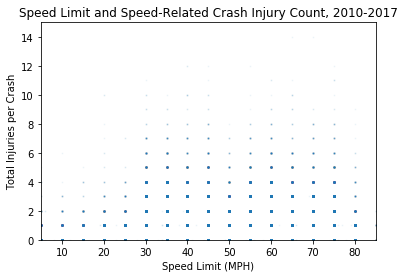

In [9]:
import seaborn as sns
plt.plot('Speed Limit', 'Crash Total Injury Count', data=speedlimit_crash_df, linestyle='none', marker='o', markersize=0.9, alpha=0.05)
plt.title("Speed Limit and Speed-Related Crash Injury Count, 2010-2017")
plt.ylabel("Total Injuries per Crash")
plt.xlabel("Speed Limit (MPH)")
plt.ylim((0,15))
plt.xlim((5,85))

plt.show()

### Speed Limit and Crash Injury Count
#### * The greatest number of crashes and injuries occured between 30 and 75 MPH.
#### * Most speed-related crashes have less than one injury per crash.
#### * The highest rate of injuries per crash occurs at speed limits between 30 and 75 miles per hour.
#### * Total injuries per crash are almost twice as high at speed limits greater than 30 MPH.

In [10]:
speedlimit_grouped = pd.DataFrame(speedlimit_crash_df.groupby(["Speed Limit"]).count()["Crash Total Injury Count"])
speedlimit_grouped=speedlimit_grouped.reset_index()
speedlimit_grouped.head()

,Speed Limit,Crash Total Injury Count
0,-1,4018
1,0,4936
2,5,553
3,6,3
4,8,1


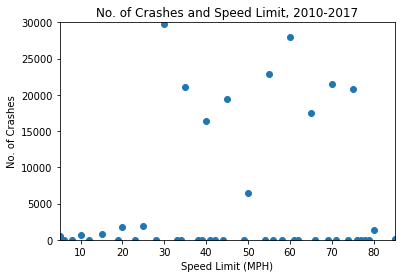

In [11]:
plt.plot('Speed Limit', 'Crash Total Injury Count', data=speedlimit_grouped, linestyle='none', marker='o')
plt.title("No. of Crashes and Speed Limit, 2010-2017")
plt.ylabel("No. of Crashes")
plt.xlabel("Speed Limit (MPH)")
plt.ylim((1,30000))
plt.xlim((5,85))

plt.show()

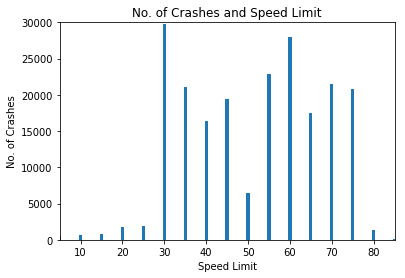

In [12]:
plt.bar('Speed Limit', 'Crash Total Injury Count', data=speedlimit_grouped)
plt.title("No. of Crashes and Speed Limit")
plt.ylabel("No. of Crashes")
plt.xlabel("Speed Limit")
plt.ylim((1,30000))
plt.xlim((5,85))

plt.show()

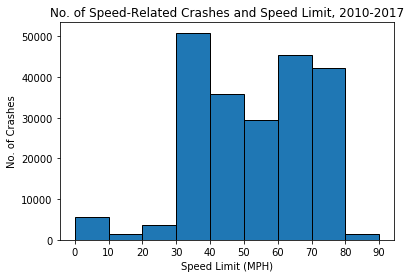

In [13]:
bins= [0,10,20,30,40,50,60,70,80,90]
plt.hist(speedlimit_crash_df["Speed Limit"], bins = bins, edgecolor="k")
plt.xticks(bins)
plt.title("No. of Speed-Related Crashes and Speed Limit, 2010-2017")
plt.ylabel("No. of Crashes")
plt.xlabel("Speed Limit (MPH)")

plt.show()

### No. of Crashes and Speed Limit
#### * The majority of crashes occurred between 30 and 79 MPH speed limits with the greatest amount in the 30-39 MPH speed limits.
#### * Speeding in 30-39 MPH speed zones caused the most crashes

In [19]:
speedlimit_injury_df = y2010_df.append(y2011_df)
speedlimit_injury_df = speedlimit_injury_df.append(y2012_df)
speedlimit_injury_df = speedlimit_injury_df.append(y2013_df)
speedlimit_injury_df = speedlimit_injury_df.append(y2014_df)
speedlimit_injury_df = speedlimit_injury_df.append(y2015_df)
speedlimit_injury_df = speedlimit_injury_df.append(y2016_df)
speedlimit_injury_df = speedlimit_injury_df.append(y2017_df)
speedlimit_injury_df = speedlimit_injury_df.drop_duplicates(['Crash ID'], keep='first')
speedlimit_injury_df.head(50)

,Crash ID,Agency,City,County,Crash Death Count,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,...,Manner of Collision,Population Group,Road Class,Speed Limit,Weather Condition,Vehicle Color,Person Age,Person Ethnicity,Person Gender,Person Type
0,11154479,Paris Police Department,Paris,Lamar,0,Non-Incapacitating Injury,1254,1,2010,Friday,...,Same Direction - One Straight-One Stopped,"25,000 - 49,999 Pop",Farm To Market,30,Cloudy,Gray,28,Black,Male,Driver
2,11154515,"Department Of Public Safety, State Of Texas",Rural Wilbarger County,Wilbarger,0,Not Injured,845,0,2010,Friday,...,One Motor Vehicle - Going Straight,Rural,US & State Highways,70,Cloudy,White,33,White,Female,Driver
5,11155308,Laredo Police Department,Laredo,Webb,0,Non-Incapacitating Injury,810,1,2010,Friday,...,Angle - Both Going Straight,"100,000 - 249,999 Pop",City Street,30,Clear,Red,72,Hispanic,Female,Driver
7,11156832,"Department Of Public Safety, State Of Texas",Rural Palo Pinto County,Palo Pinto,0,Non-Incapacitating Injury,1635,1,2010,Friday,...,One Motor Vehicle - Going Straight,Rural,Farm To Market,60,Clear,Red,48,White,Male,Driver Of Motorcycle Type Vehicle
8,11156835,"Department Of Public Safety, State Of Texas",Rural Parker County,Parker,0,Not Injured,130,0,2010,Friday,...,One Motor Vehicle - Going Straight,Rural,County Road,0,Clear,Gray,54,White,Male,Driver
9,11157938,Fort Worth Police Department,Fort Worth,Tarrant,0,Not Injured,610,0,2010,Friday,...,One Motor Vehicle - Going Straight,"250,000 Pop And Over",US & State Highways,40,Clear,Silver,29,White,Male,Driver
10,11158122,"Department Of Public Safety, State Of Texas",Rural Tyler County,Tyler,0,Not Injured,1410,0,2010,Friday,...,One Motor Vehicle - Going Straight,Rural,County Road,30,Clear,Blue,28,White,Male,Driver
13,11158273,Mesquite Police Department,Mesquite,Dallas,0,Not Injured,450,0,2010,Friday,...,One Motor Vehicle - Going Straight,"100,000 - 249,999 Pop",Interstate,45,Cloudy,Black,20,Black,Male,Driver
14,11158274,Mesquite Police Department,Mesquite,Dallas,0,Not Injured,2300,0,2010,Friday,...,One Motor Vehicle - Going Straight,"100,000 - 249,999 Pop",Non Trafficway,0,Clear,Silver,17,White,Male,Driver
15,11159558,"Department Of Public Safety, State Of Texas",Rural McLennan County,McLennan,0,Not Injured,450,0,2010,Friday,...,One Motor Vehicle - Turning Right,Rural,County Road,40,Clear,Maroon,18,Hispanic,Male,Driver


In [20]:
stacked_df = speedlimit_injury_df[['Crash Severity', 'Crash Year', 'Speed Limit']]
stacked_df.head()

,Crash Severity,Crash Year,Speed Limit
0,Non-Incapacitating Injury,2010,30
2,Not Injured,2010,70
5,Non-Incapacitating Injury,2010,30
7,Non-Incapacitating Injury,2010,60
8,Not Injured,2010,0


In [21]:


# Creating DF for no injuries for drivers
tx_incidents_not_injured = stacked_df.loc[(stacked_df['Crash Severity'] == 'Not Injured')]

# Creating DF for injured (including all three types of injuries) for drivers
tx_incidents_injured = stacked_df.loc[(stacked_df['Crash Severity'] == 'Possible Injury') |
                                                 (stacked_df['Crash Severity'] == 'Incapacitating Injury') |
                                                 (stacked_df['Crash Severity'] == 'Non-Incapacitating Injury')]

# Creating for death for drivers
tx_incidents_killed = stacked_df.loc[(stacked_df['Crash Severity'] == 'Killed')]






/Users/jennifervacanti/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


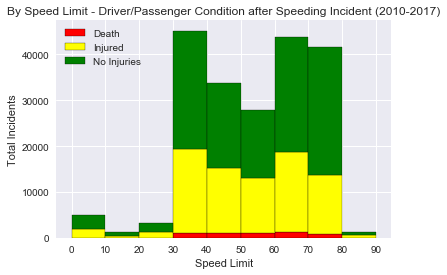

In [24]:

# Stack the data
plt.figure()
plt.hist( (tx_incidents_killed["Speed Limit"],  
           tx_incidents_injured["Speed Limit"], 
           tx_incidents_not_injured["Speed Limit"]), 
           bins = bins, stacked=True, 
         color=["red", "yellow", "green"],
         label=["Death","Injured", "No Injuries"],
         edgecolor="k")

plt.xticks(bins)
sns.set()
plt.title("By Speed Limit - Driver/Passenger Condition after Speeding Incident (2010-2017)")
plt.ylabel("Total Incidents")
plt.xlabel("Speed Limit")
plt.legend(loc=2)
plt.savefig("By Age Group and Condition - Driver and Passenger Condition after Speeding Incident (2010-2017).png", 
            dpi= 200)
plt.show()

### By Speed Limit - driver/passenger condition
#### * The majority of crashes occurred between 30 and 79 MPH speed limits with the greatest amount in the 30-39 MPH speed limit zones.
#### * Speeding in 30-39 MPH speed zones caused the most speed-related crashes
#### * Speeds higher than 30 MPH greatly increase risk of injury or death.